In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
comb_df = train_df.append(test_df)
members_df = pd.read_csv('data/members.csv')
songs_df = pd.read_csv('data/songs.csv')
song_extra_info_df = pd.read_csv('data/song_extra_info.csv')

songs_df = songs_df.merge(song_extra_info_df, on='song_id', how='left')

train_df = train_df.merge(songs_df, on='song_id', how='left')
test_df = test_df.merge(songs_df, on='song_id', how='left')

train_df = train_df.merge(members_df, on='msno', how='left')
test_df = test_df.merge(members_df, on='msno', how='left')

# fill missing data to visualize
train_df.fillna('nan', inplace=True)
test_df.fillna('nan', inplace=True)

<a id='chapter_song'></a>
# Songs

It seems that there exists outliers.
Now we treat them as outliers and so drop them.

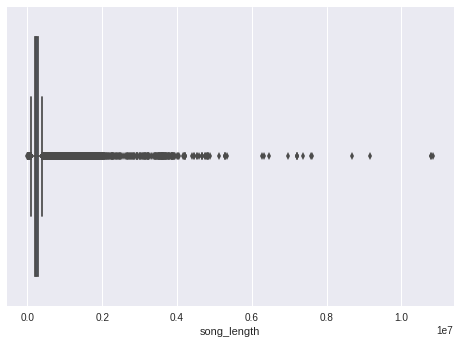

count      359914
mean       248419
std        146699
min          1393
25%        198217
50%        233732
75%        274746
max      10851706
Name: song_length, dtype: int64

In [3]:
song_length_unique_df = train_df[['song_id', 'song_length']].drop_duplicates('song_id')

song_length_unique_series = song_length_unique_df['song_length'].astype(np.float64)

# assert(song_length_unique_series.duplicates())
# print(song_length_unique_df)
sns.boxplot(x=song_length_unique_series)
sns.plt.show()

song_length_unique_series.describe().astype(np.int64)

Notice that there exists very long song were played by users.

In [4]:
song_length_unique_series = song_length_unique_series[np.abs(song_length_unique_series-song_length_unique_series.mean()) <= (3 * song_length_unique_series.std())]
song_length_unique_series.describe().astype(np.int64)

count    356821
mean     239738
std       78559
min        1393
25%      197903
50%      233128
75%      273438
max      688363
Name: song_length, dtype: int64

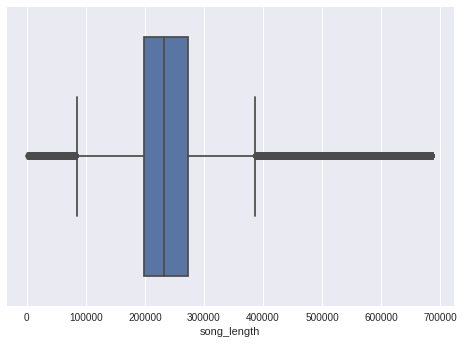

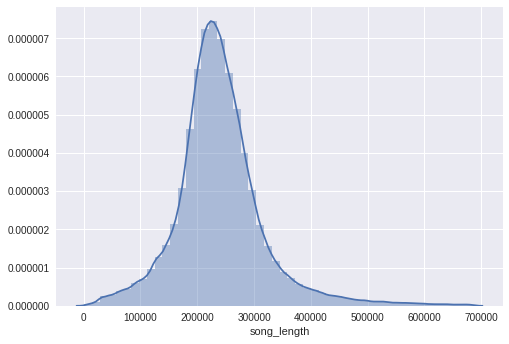

In [6]:
sns.boxplot(song_length_unique_series)
sns.plt.show()

sns.distplot(song_length_unique_series)
sns.plt.show()

It seems the distribution is almost normal after removing outliers.

In [7]:
song_genre_ids_series = train_df['genre_ids']
# print(list(song_genre_ids_series))

There are missing data and all seperators are only '|' sign.

In [ ]:
sns.barplot(y='genre_ids', data=train_df)
sns.plt.show()